##**Load thư viện OpenCV**

In [15]:
import cv2
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

## Hàm download ảnh từ 1 địa chỉ và chuyển sang kiểu numpy array
def _downloadImage(url):
  resp = requests.get(url)
  img = np.asarray(bytearray(resp.content), dtype="uint8")
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
  return img

## **1. Scale ảnh**: Thay đổi kích thước chiều dài, chiều rộng của ảnh ban đầu  

Kích thước ảnh gốc: (900, 631, 3)
Kích thước ảnh scale 1: (1800, 1262, 3)
Kích thước ảnh scale 2: (1800, 315, 3)


(<Axes: title={'center': 'Scale Image 2'}>,
 Text(0.5, 1.0, 'Scale Image 2'))

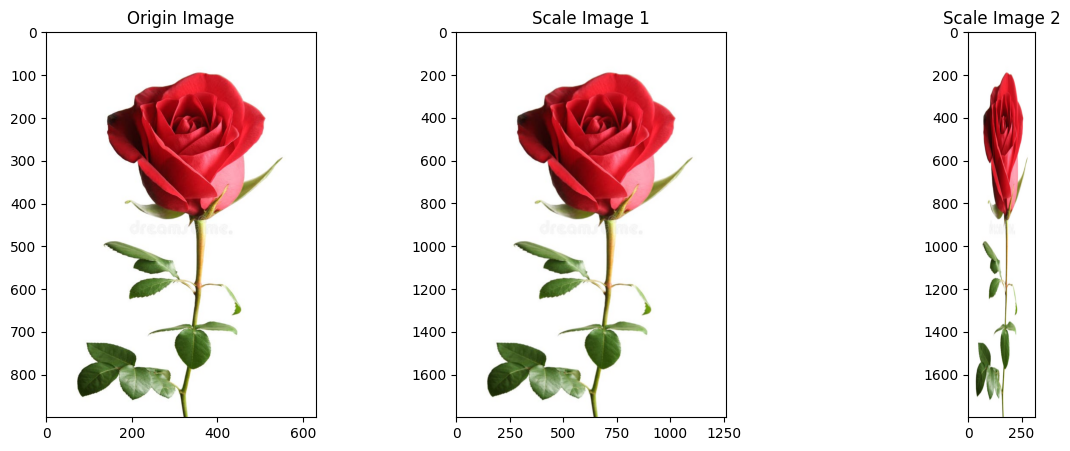

In [16]:
url = 'https://thumbs.dreamstime.com/b/red-rose-4590099.jpg'
img = _downloadImage(url)
print('Kích thước ảnh gốc: {}'.format(img.shape))

# Scale image bằng cách gấp đôi hoặc chia đôi width and height
h, w = img.shape[:2]
imgScale1 = cv2.resize(img, (int(w*2), int(h*2)), interpolation = cv2.INTER_LINEAR)
imgScale2 = cv2.resize(img, (int(w/2), int(h*2)), interpolation = cv2.INTER_LINEAR)
print('Kích thước ảnh scale 1: {}'.format(imgScale1.shape))
print('Kích thước ảnh scale 2: {}'.format(imgScale2.shape))

plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(img), plt.title('Origin Image')
plt.subplot(132), plt.imshow(imgScale1), plt.title('Scale Image 1')
plt.subplot(133), plt.imshow(imgScale2), plt.title('Scale Image 2')

> *Nhận xét: Ảnh sau khi scale kích thước về chiều dài và chiều rộng thì nội dung của ảnh không thay đổi*

## **2. Dịch chuyển ảnh (Translate)**: Dịch chuyển ảnh lên, xuống, trái, phải so với frame ảnh ban đầu  

Kích thước ảnh gốc: (900, 631, 3)
Kích thước ảnh translate 1: (900, 631, 3)
Kích thước ảnh translate 2: (900, 631, 3)
Kích thước ảnh translate 3: (900, 631, 3)


(<Axes: title={'center': 'Trans Image 3 (phải, lên)'}>,
 Text(0.5, 1.0, 'Trans Image 3 (phải, lên)'))

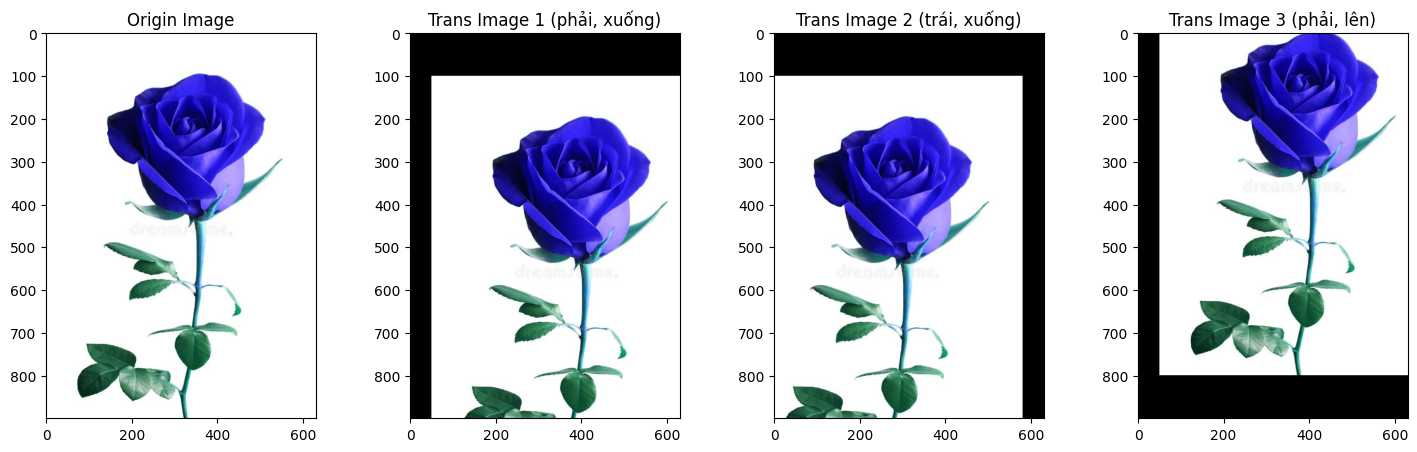

In [ ]:
url = 'https://thumbs.dreamstime.com/b/red-rose-4590099.jpg'
img = _downloadImage(url)
print('Kích thước ảnh gốc: {}'.format(img.shape))

h, w = img.shape[:2]
tx, ty = (50, 100)

## Dịch chuyển ảnh sang phải và xuống dưới
M1 = np.array([[1,0,tx], [0,1,ty]], dtype=np.float32)
imgTran1 = cv2.warpAffine(img, M1, (w,h))
print('Kích thước ảnh translate 1: {}'.format(imgTran1.shape))

## Dịch chuyển ảnh sang trái và xuống dưới
M2 = np.array([[1,0,-tx], [0,1,ty]], dtype=np.float32)
imgTran2 = cv2.warpAffine(img, M2, (w,h))
print('Kích thước ảnh translate 2: {}'.format(imgTran2.shape))

## Dịch chuyển ảnh sang phải và lên trên
M3 = np.array([[1,0,tx], [0,1,-ty]], dtype=np.float32)
imgTran3 = cv2.warpAffine(img, M3, (w,h))
print('Kích thước ảnh translate 3: {}'.format(imgTran3.shape))

plt.figure(figsize=(18,5))
plt.subplot(141), plt.imshow(img), plt.title('Origin Image')
plt.subplot(142), plt.imshow(imgTran1), plt.title('Trans Image 1 (phải, xuống)')
plt.subplot(143), plt.imshow(imgTran2), plt.title('Trans Image 2 (trái, xuống)')
plt.subplot(144), plt.imshow(imgTran3), plt.title('Trans Image 3 (phải, lên)')

> *Nhận xét: Ảnh sau khi dịch chuyển không thay đổi kích thước nhưng nội dung bị dịch chuyển*

## **3. Xoay ảnh (Rotation)**: xoay ảnh theo một góc xác định

(<Axes: title={'center': 'Rotate Image 3 (xoay phải tại gốc)'}>,
 Text(0.5, 1.0, 'Rotate Image 3 (xoay phải tại gốc)'))

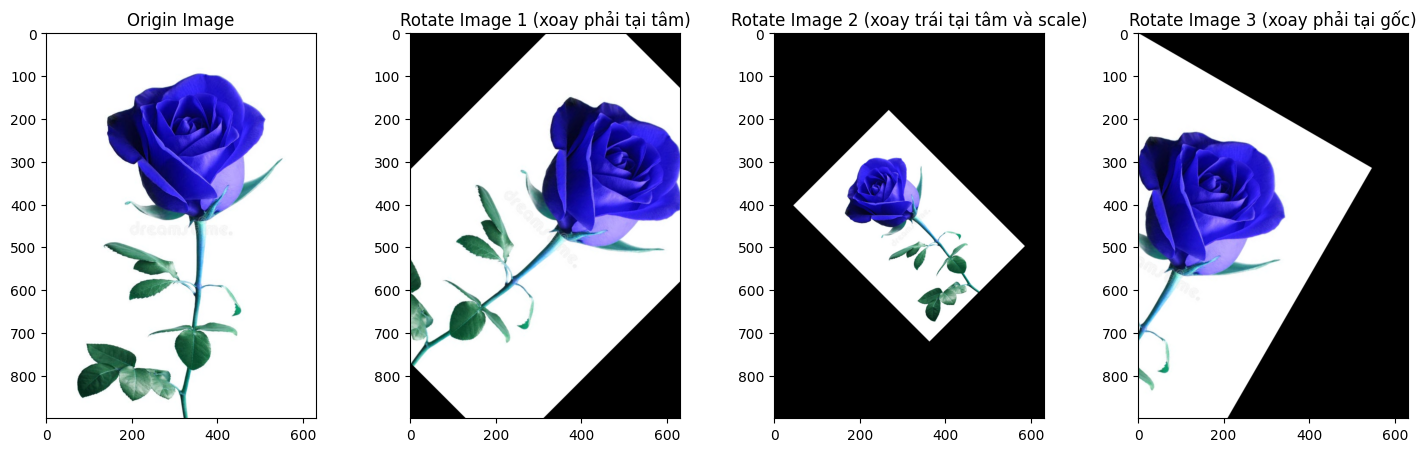

In [ ]:
url = 'https://thumbs.dreamstime.com/b/red-rose-4590099.jpg'
img = _downloadImage(url)

h, w = img.shape[:2]

# Xoay ảnh 45 độ tại tâm của ảnh, độ phóng đại ảnh không đổi.
M1 = cv2.getRotationMatrix2D(center = (w/2,h/2), angle=-45, scale=1)
imgRot1 = cv2.warpAffine(img, M1, (w,h))

# Xoay ảnh -45 độ tại tâm của ảnh và độ phóng đại giảm 1/2
M2 = cv2.getRotationMatrix2D(center = (w/2,h/2), angle=45, scale=0.5)
imgRot2 = cv2.warpAffine(img, M2, (w,h))

# Xoay ảnh 30 độ tại góc trên bên trái
M3 = cv2.getRotationMatrix2D(center = (0,0), angle=-30, scale=1)
imgRot3 = cv2.warpAffine(img, M3, (w,h))

plt.figure(figsize=(18,5))
plt.subplot(141), plt.imshow(img), plt.title('Origin Image')
plt.subplot(142), plt.imshow(imgRot1), plt.title('Rotate Image 1 (xoay phải tại tâm)')
plt.subplot(143), plt.imshow(imgRot2), plt.title('Rotate Image 2 (xoay trái tại tâm và scale)')
plt.subplot(144), plt.imshow(imgRot3), plt.title('Rotate Image 3 (xoay phải tại gốc)')

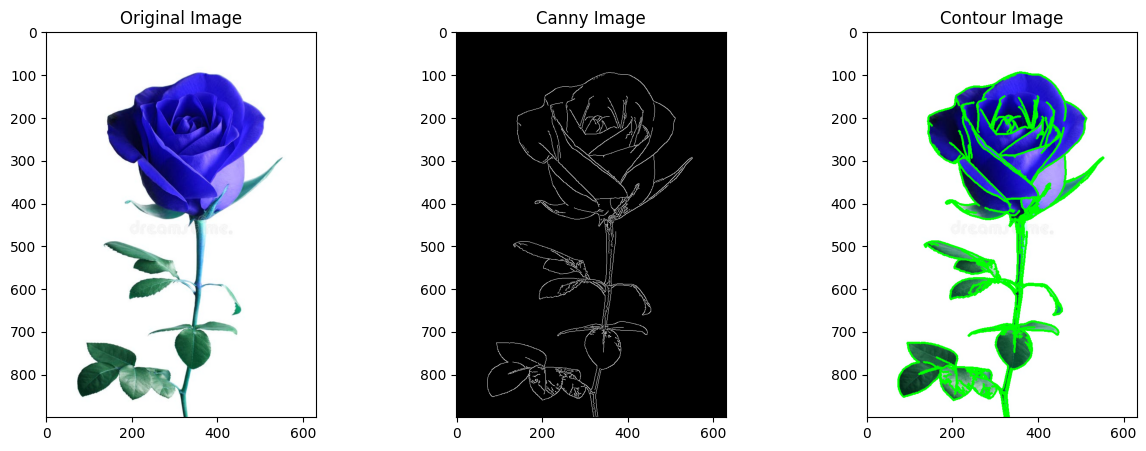

In [ ]:
url = 'https://thumbs.dreamstime.com/b/red-rose-4590099.jpg'
img = _downloadImage(url)

imgCanny = cv2.Canny(img, 100, 200)

contours, hierarchy = cv2.findContours(imgCanny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
imgCont = img.copy()
cv2.drawContours(imgCont, contours, -1, (0, 255, 0), 3)

plt.figure(figsize=(15,5))
plt.subplot(131),plt.imshow(img,cmap = 'gray'),plt.title('Original Image')
plt.subplot(132),plt.imshow(imgCanny,cmap = 'gray'),plt.title('Canny Image')
plt.subplot(133),plt.imshow(imgCont,cmap = 'gray'),plt.title('Contour Image')

plt.show()